In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [2]:
#opening pickle file of augmented added data
with open('../data/external/combined_augmented_data_v2.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)

###### LabelBinarizer
LB is a utility class commonly used in machine learning and data preprocessing tasks, particularly in the field of classification. It is typically employed to convert categorical labels into binary vectors, enabling easier analysis and computation by machine learning algorithms.

In [3]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [4]:
# Normalize the data
x_train = X_train / 255
x_test = X_test / 255

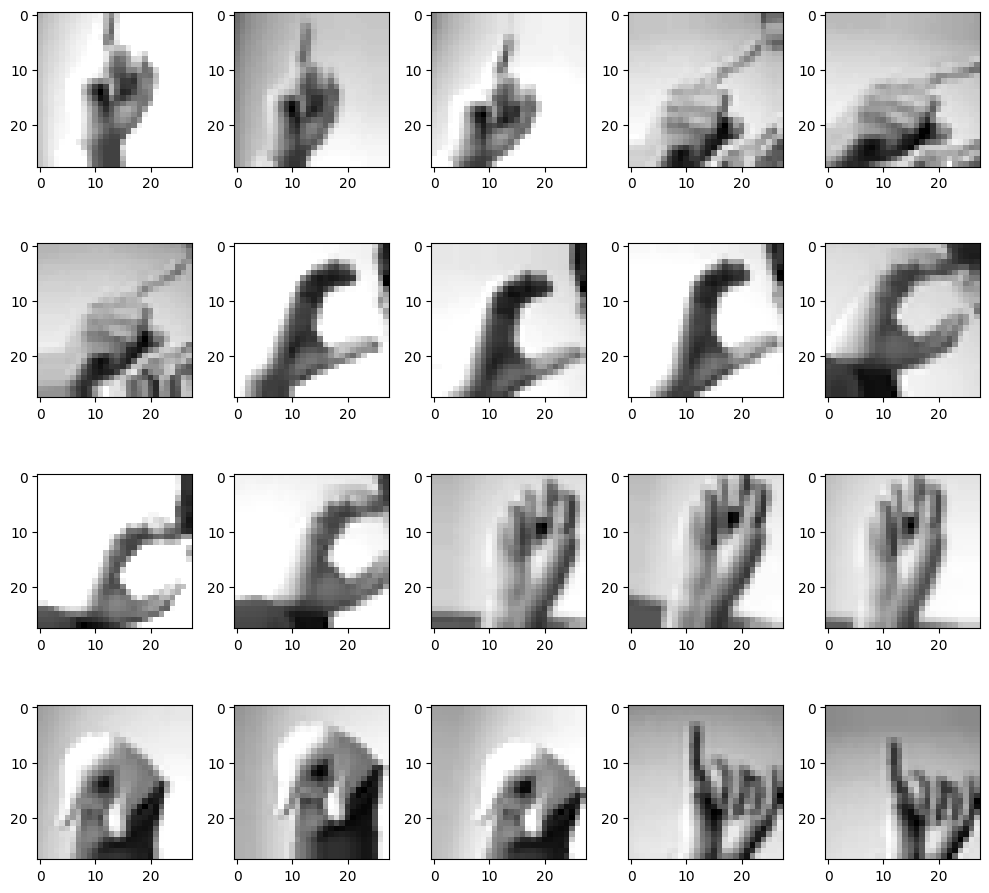

In [5]:
f, ax = plt.subplots(4,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

In [6]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

###### CNN Architecture

This is a convolutional neural network (CNN) architecture designed for image classification tasks. Let's break down the different components and layers of the network:

- Input layer: The network expects grayscale images with dimensions of 28x28 pixels.

- Convolutional layer 1: The first convolutional layer consists of 75 filters of size 3x3. It applies these filters to the input image, using the ReLU activation function to introduce non-linearity.

- Batch Normalization 1: Batch normalization is applied to normalize the outputs of the previous layer, improving the stability and speed of training.

- MaxPooling layer 1: A max pooling operation with a 2x2 window and stride 2 is performed to reduce the spatial dimensions of the feature maps by half.

- Convolutional layer 2: The second convolutional layer consists of 50 filters of size 3x3, followed by the ReLU activation function.

- Dropout: Dropout regularization with a rate of 0.2 is applied to randomly deactivate 20% of the neurons in the previous layer during training, reducing overfitting.

- Batch Normalization 2: Similar to Batch Normalization 1, this layer normalizes the outputs of the previous layer.

- MaxPooling layer 2: Another max pooling operation is performed with a 2x2 window and stride 2 to further downsample the feature maps.

- Convolutional layer 3: The third convolutional layer consists of 25 filters of size 3x3, followed by the ReLU activation function.

- Batch Normalization 3: The outputs of the previous layer are normalized.

- MaxPooling layer 3: Another max pooling operation is performed with a 2x2 window and stride 2.

- Flatten layer: The feature maps are flattened into a 1D vector to be fed into the dense layers.

- Dense layer 1: A fully connected layer with 512 units and ReLU activation is added to capture high-level features.

- Dropout: Another dropout layer is added with a rate of 0.3 to further reduce overfitting.

- Dense layer 2: The final dense layer consists of 24 units, corresponding to the number of classes in the classification task. It uses the softmax activation function to output class probabilities.

In [7]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 50)       2

In [8]:
history = model.fit(x_train,y_train, batch_size = 128 ,epochs = 2 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction], verbose=1)


Epoch 1/2
858/858 [==============================] - 152s 176ms/step - loss: 0.3931 - accuracy: 0.8773 - val_loss: 0.1478 - val_accuracy: 0.9539 - lr: 0.0010
Epoch 2/2
858/858 [==============================] - 141s 165ms/step - loss: 0.0462 - accuracy: 0.9850 - val_loss: 0.0840 - val_accuracy: 0.9721 - lr: 0.0010


In [9]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

897/897 [==============================] - 13s 14ms/step - loss: 0.0840 - accuracy: 0.9721
Accuracy of the model is -  97.21486568450928 %


In [11]:
# save the model to an h5 file
model.save('../data/external/finalModel.h5')

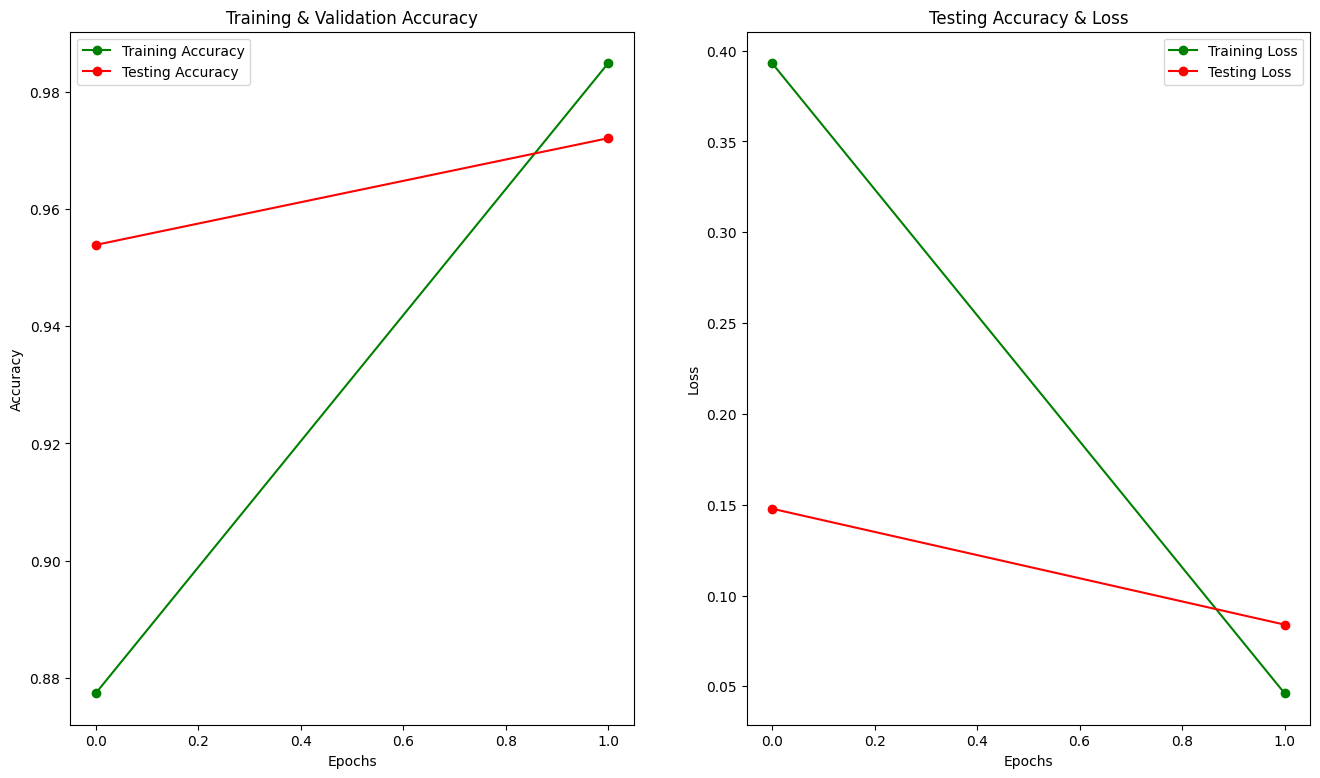

In [10]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(16,9)

epochs_acc = [i for i in range(len(history.history['accuracy']))]
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

ax[0].plot(epochs_acc, train_acc, 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs_acc, val_acc, 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

epochs_loss = [i for i in range(len(history.history['loss']))]
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax[1].plot(epochs_loss, train_loss, 'g-o' , label = 'Training Loss')
ax[1].plot(epochs_loss, val_loss, 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()


In [15]:
from keras.models import load_model

# Load the saved model
finalModel = load_model('../data/external/finalModel.h5')


In [20]:
predictions = finalModel.predict(x_test)
# for i in range(len(predictions)):
#     if(predictions[i] >= 9):
#         predictions[i] += 1
# predictions[:5]  

897/897 [==============================] - 7s 7ms/step


In [21]:
predictions

array([[2.0767281e-10, 6.3486776e-13, 3.4447307e-06, ..., 2.0662152e-13,
        2.7320695e-09, 2.7954631e-08],
       [4.6211797e-12, 6.5737368e-12, 6.2068216e-07, ..., 1.1552631e-12,
        2.0999238e-07, 4.3741069e-10],
       [2.1608162e-12, 8.8812013e-11, 1.0676492e-05, ..., 2.2554510e-12,
        2.4060650e-05, 9.3959347e-09],
       ...,
       [9.1569079e-12, 9.9184458e-15, 9.9999702e-01, ..., 8.0681501e-18,
        1.3139058e-10, 2.1536645e-15],
       [2.3873454e-15, 7.2189386e-14, 1.0129761e-17, ..., 3.3785888e-20,
        1.4844238e-16, 7.0690055e-21],
       [9.1335262e-13, 6.6630026e-16, 9.9999869e-01, ..., 8.7843707e-19,
        1.2486462e-11, 3.1631712e-16]], dtype=float32)